<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br>
<h1>Wayfair Case Study</h1>
<em>The Impact of Reviews in the Black Friday Deals</em><br><br>

Written by Wendy Coronell - Student <br>
Business Analysis with Structured Data - DAT-7470 - FMBAN1 <br>
Hult International Business School <br>

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Do customer review scores affect percentage discounts during the Black Friday sale?

Wayfair is one of the largest home retailers in the world, with sales managed 100% online and offering their product catalog through their website. In November, they offer their customers great discounts as part of Black Friday. This case study aims to analyze the impact that reviews have on the discount percentage of products listed during Black Friday. The product information is contained in the H_furniture database, where it is classified as: category, subcategory, color, size, reviews, brand, and price. Through this analysis, statistical tools will be used to analyze the relationships of the different variables and their trends. Additionally, SQL queries will be used to filter the database information and subsequent analysis in Python through the pandas library. This study is crucial to understand how customer reviews can influence pricing strategies during major sales events like Black Friday.
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Answer to the business question

The analysis conducted indicates that customer generated reviews in this database do not significantly affect the discount percentage during the Black Friday promotion. In addition, approximately 30% of the discounted products did not have reviews, suggesting that reviews are not the main feature in determining the discount. It can be observed that the products in the Black Friday deal do not have a wide range of reviews, indicating that they are not well known to consumers and have low turnover. This reinforces the idea that discounts may be more influenced by other factors, such as the need to move inventory or draw attention to less popular products. It is likely that Wayfair uses these promotions to improve the visibility of new or low-demand products. Taken together, these findings suggest that Wayfair's discounting strategy is designed to optimize inventory turnover and draw consumers' attention to a wider variety of products.

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Top Three Insights

Reviewing the correlation matrix, we can identify some attributes that could be important in the analysis of Black Friday discounts, this analysis is based on the discount percentage column of each product:

<h2>Increase in reviews:</h2><br>
the following are the results of the correlation between the reviews and the discount rate:

<strong>Five star</strong>: 0.16

<strong>Four star</strong>: 0.13

<strong>Three star</strong>: 0.09

<strong>Two star</strong>: 0.07

<strong>One star</strong>: 0.04

The correlations between customer reviews and discounts are positive but relatively low, especially for lower-star reviews. This suggests that Wayfair might be using a marketing strategy focused on promoting lesser-known products by offering a wide range of discounts. This approach could not only increase sales of these products but also encourage users to generate new reviews.

Additionally, by offering discounts on less recognized products, Wayfair can improve its inventory turnover, particularly for items that have been in stock for a long time. Implementing these strategies can help the company maintain a steady flow of new and attractive products for customers, thereby enhancing operational efficiency and customer satisfaction.

<h2>Price influence:</h2><br>

The correlation between original price and percentage discount is 0.12, indicating a slight positive relationship. This suggests that products with higher original prices may receive higher percentage discounts. Although the correlation is not strong, it implies that Wayfair may offer more significant discounts on higher priced items to make them more attractive to consumers during sales events such as Black Friday. This strategy can help move high-value inventory that might otherwise be difficult to sell at full price. In addition, offering substantial discounts on expensive items can create a perception of higher value among consumers, which could increase overall sales. Wayfair can also use these discounts to attract customers to its website, where they can purchase additional items at lower discounts or at full price.
Brand influence also plays an important role in determining discounts. Products from well-known brands may receive higher discounts compared to products from lesser-known brands.


<h2>Product dimensions:</h2><br>

Product dimensions (height, width and depth) have correlations of 0.10, 0.13 and 0.13 respectively with discount percentage. This suggests that product dimensions may influence the discounts offered. It is possible that storage and logistics costs play a role in this relationship, as larger products may be more costly to store and transport. Therefore, Wayfair could offer higher discounts on these products to accelerate turnover and reduce costs. In addition, offering discounts on bulky products can attract consumers looking to take advantage of significant deals on larger items.
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# SQL Queries

Here are the queries used for the analysis in SQL:

#selecting all the variables to be included in the correlation
SELECT a.product_name,
CASE 
	WHEN red = '1' THEN '1'
	WHEN blue = '1' THEN '2'              #Case statment to convert a categorical value into a numerical.
	WHEN black = '1' THEN '3'
	WHEN green = '1' THEN '4'
	WHEN yellow = '1' THEN '5'
	WHEN brown = '1' THEN '6'
	WHEN gray = '1' THEN '7'
	WHEN white = '1' THEN '8'
	WHEN other = '1' THEN '9'
	ELSE '0' END AS color,
	f.category_id , g.brand_id,g.brand_name, h.category, j.subcategory_id, p.subcategory,
ROUND(((c.original_price - c.discounted_price)/c.original_price) * 100,2) as percentage_discount,
c.original_price, c.discounted_price, c.black_friday_deal, e.height, e.width, e.depth, 
d.five_star,d.four_star, d.three_star, d.two_star, d.one_star
FROM product AS a
LEFT JOIN color As b
ON a.color_id = b.color_id               #Joining tables using Left Join to bring Null Values in the reviews
LEFT JOIN price as c
ON a.price_id = c.price_id
LEFT JOIN review AS d
ON a.review_id = d.review_id
LEFT JOIN size AS e
ON a.size_id = e.size_id 
LEFT JOIN procat as f
ON a.product_id = f.product_id 
LEFT JOIN brand AS g
ON a.brand_id = g.brand_id 
LEFT JOIN category AS h
ON f.category_id =h.category_id 
LEFT JOIN catsub as j
ON a.product_id = j.product_id 
LEFT JOIN subcategory as p
ON j.subcategory_id = p.subcategory_id 
WHERE c.black_friday_deal = 1;            #Filtering for only the products with the black friday deals.


In [14]:
#Using AI help to generate the code for reading the database into the Python environment
#importing MySql to read the database directly in Python.
#Importing CSV to generate the final file.
import mysql.connector as sql
import csv

#Connecting the database
conn = sql.connect(
    host="localhost",
    port=3306,
    user="root",
    password="",
    database="h_furniture"
)

# Creating a cursor
cursor = conn.cursor()
#This query contain the information of product_name, colors, price, brand, size, reviews
query = """
SELECT a.product_name,
CASE 
	WHEN red = '1' THEN '1'
	WHEN blue = '1' THEN '2'
	WHEN black = '1' THEN '3'
	WHEN green = '1' THEN '4'
	WHEN yellow = '1' THEN '5'
	WHEN brown = '1' THEN '6'
	WHEN gray = '1' THEN '7'
	WHEN white = '1' THEN '8'
	WHEN other = '1' THEN '9'
	ELSE '0' 
END AS color, f.category_id , g.brand_id,g.brand_name, h.category, j.subcategory_id, p.subcategory,
ROUND(((c.original_price - c.discounted_price)/c.original_price) * 100,2) as percentage_discount,
c.original_price, c.discounted_price, c.black_friday_deal, e.height, e.width, e.depth, 
d.five_star,d.four_star, d.three_star, d.two_star, d.one_star
FROM product AS a
LEFT JOIN color As b
ON a.color_id = b.color_id
LEFT JOIN price as c
ON a.price_id = c.price_id
LEFT JOIN review AS d
ON a.review_id = d.review_id
LEFT JOIN size AS e
ON a.size_id = e.size_id 
LEFT JOIN procat as f
ON a.product_id = f.product_id 
LEFT JOIN brand AS g
ON a.brand_id = g.brand_id 
LEFT JOIN category AS h
ON f.category_id =h.category_id 
LEFT JOIN catsub as j
ON a.product_id = j.product_id 
LEFT JOIN subcategory as p
ON j.subcategory_id = p.subcategory_id 
WHERE c.black_friday_deal = 1;
"""

cursor.execute(query)
# Obtaining results
rows = cursor.fetchall()


In [15]:
# Checking there are results before accessing cursor.description
if cursor.description:
    column_names = [description[0] for description in cursor.description]

    # Writing result in a CSV file
    with open('query.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(column_names)  # Escribir encabezados
        csvwriter.writerows(rows)  # Escribir datos
else:
    print("No se encontraron resultados.")

# Closing the cursor and connection
cursor.close()
conn.close()

#This code was generated with the help of AI, to obtain a CSV file direct into the python environment

# Analysis of results

In [16]:
#importing Pandas
import pandas as pd
import matplotlib as plt
import seaborn as sns 

In [17]:
#read the CSV file

# storing the path to the dataset
file = "./query.csv"

# reading in the data
black_friday = pd.read_csv('query.csv', encoding='latin1')
black_friday.head(n=5)

,product_name,color,category_id,brand_id,brand_name,category,subcategory_id,subcategory,percentage_discount,original_price,discounted_price,black_friday_deal,height,width,depth,five_star,four_star,three_star,two_star,one_star
0,Allura 67 Kitchen Pantry,2,2,2,Three Posts,Office,2,Organization,40.79,429,254,1,67.0,28.0,15.0,173.0,42.0,22.0,10.0,13.0
1,Theory Glass Picture Frame - Set of 2 (Set of 2),8,1,3,Eichholtz,Bedroom,1,Decor,48.88,489,250,1,7.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Haute Chapeau Haute Chapeau Rouge I,7,3,4,Mercer41,Living Room,1,Decor,43.97,489,274,1,16.0,16.0,1.5,666.0,43.0,25.0,7.0,11.0
3,Daniel Jean-baptiste plants and Flowers no,1,4,6,Bay Isle Home,Entry & Mudroom,1,Decor,82.14,140,25,1,18.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
4,LI55971LL Framed tempered glass shower door 56...,7,5,7,Lili,Bathroom,3,Renovation,50.06,799,399,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [18]:
# Info related to each feature
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         217 non-null    object 
 1   color                217 non-null    int64  
 2   category_id          217 non-null    int64  
 3   brand_id             217 non-null    int64  
 4   brand_name           217 non-null    object 
 5   category             217 non-null    object 
 6   subcategory_id       217 non-null    int64  
 7   subcategory          217 non-null    object 
 8   percentage_discount  217 non-null    float64
 9   original_price       217 non-null    int64  
 10  discounted_price     217 non-null    int64  
 11  black_friday_deal    217 non-null    int64  
 12  height               217 non-null    float64
 13  width                217 non-null    float64
 14  depth                217 non-null    float64
 15  five_star            155 non-null    flo

The database contains 1285 items in total and 217 products with black friday discounts representing 16.8% of the total database. 155 products contain reviews in the 5 star categories, the rest are null values. The categorical variables such as color, category, subcategory, brand were converted to numbers to facilitate the analysis and correlation of the values with the black friday discounts.

The colors were classified in the SQL Query where each number represents a different color in the database as follows:

<strong>Red</strong> = 1

<strong>Blue</strong> = 2

<strong>Black</strong> = 3

<strong>Green</strong> = 4

<strong>Yellow</strong> = 5

<strong>Brown</strong> = 6

<strong>Gray</strong> = 7

<strong>White</strong> = 8

<strong>Other</strong> = 9.

For the other variables the Id's are used as a single value. An analysis of the frequency of these values in the filtered products will be made later.

In [19]:
# Descriptive statistics on numeric columns
black_friday.describe()

,color,category_id,brand_id,subcategory_id,percentage_discount,original_price,discounted_price,black_friday_deal,height,width,depth,five_star,four_star,three_star,two_star,one_star
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,7.101382,5.483871,201.944700,6.718894,30.248157,351.341014,231.092166,1.0,9.985023,12.254194,5.430230,466.129032,87.819355,30.800000,15.283871,21.819355
std,2.490509,2.748900,133.837646,4.999006,20.266956,563.634760,416.320824,0.0,21.270491,31.125642,23.764316,1769.725174,341.892830,128.485302,69.377731,117.539243
min,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,5.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,66.000000,3.000000,13.700000,60.000000,44.000000,1.0,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,203.000000,6.000000,24.530000,165.000000,108.000000,1.0,0.000000,0.000000,0.000000,36.000000,5.000000,2.000000,1.000000,1.000000
75%,9.000000,8.000000,336.000000,8.000000,46.200000,405.000000,245.000000,1.0,7.000000,12.000000,0.000000,174.500000,30.500000,13.000000,8.000000,8.000000
max,9.000000,11.000000,446.000000,22.000000,82.270000,4550.000000,3698.000000,1.0,108.000000,240.000000,240.000000,12948.000000,2414.000000,1227.000000,743.000000,1356.000000


The average percentage of discounts in this black friday was 30.2%, the lowest was 0% and the highest was 82.27%, which means a great variety of discounts. The average number of reviews with 5 stars was 466, while the average number of reviews with only one star was 22, this indicates that we have more positive than negative comments, on the other hand the standard deviation of the reviews is high which means that we have products that have a significant number of revies and others with low amounts, the sample have unequal variance. On the other hand, not all products have reviews, only 71% do.

The average original price is 351 USD, resulting in a final price of 231 USD on average, being congruent with the discount percentage.

The size of the products also gives us a great variety of dimensions, however the average indicates that most of the products are of medium size.

In [20]:
# Descriptive statistics on non-numeric columns
black_friday.describe(include = 'object')

,product_name,brand_name,category,subcategory
count,217,217,217,217
unique,214,134,11,20
top,Everlee 4 in 1 Convertible Crib,Red Barrel Studio,Bathroom,Decor
freq,3,9,39,44


For the categorical information such as brand, category and subcategory we have the following results: the category with the highest discounts is Bathroom with 39 products offered on black friday also it can be seen that all categories have discounted products, the subcategory decor has 44 products with 20 participating subcategories vs 22 that are in the database, finally the most recurrent brand is Red Barrel studio with 9 products, it can also be seen that 134 brands participated in black friday out of 450 approximately 30% of the brands offer discounts on this opportunity.

In [21]:
#Counting Color values
black_friday['color'].value_counts(normalize = True,
                               sort      = True,
                               ascending = False).head(n=3)


color
9    0.474654
3    0.152074
8    0.147465
Name: proportion, dtype: float64

In [77]:
#Counting five star reviews
black_friday['five_star'].value_counts(normalize = False,
                               sort      = True,
                               ascending = False).head(n=5)

five_star
1.0     18
0.0      6
6.0      5
2.0      5
36.0     4
Name: count, dtype: int64

In [32]:
#Counting Categories values
black_friday['category'].value_counts(normalize = True,
                               sort      = True,
                               ascending = False).head(n=3)

category
Bathroom           0.179724
Lighting           0.133641
Outdoor & Patio    0.124424
Name: proportion, dtype: float64

In [128]:
#Counting subcategories values
black_friday['subcategory'].value_counts(normalize = True,
                               sort      = True,
                               ascending = False).head(n=3)

subcategory
Decor          0.202765
Furniture      0.179724
Accessories    0.129032
Name: proportion, dtype: float64

In [78]:
#Counting brand values
black_friday['brand_name'].value_counts(normalize = True,
                               sort      = True,
                               ascending = False).head(n=3)


brand_name
Red Barrel Studio    0.041475
Lark Manor           0.027650
Birch Lane           0.027650
Name: proportion, dtype: float64

For the analysis of the categorical variables we took the top three of the most recurrent characteristics, in this way we have that the most frequent color was Others with 47%, followed by the color black with 15% of the products. on the other hand in the varibale category we have that Bathroom has 18% of the total products with discount, followed by Lighting with 13%. In the subcategory column we have Decor with 20% of the total products followed by Furniture with 18%. Finally the representative brands are Red Barrel studio with 4% followed by Lark Manor with 2.7% which indicates the great variety of brands offering their discounts. Now let's review in depth the relationship of these variables through the correlation.

In [28]:
#Correlation for all the variables with numeric values
black_friday.corr(method='pearson', numeric_only=True).round(decimals=2)


,color,category_id,brand_id,subcategory_id,percentage_discount,original_price,discounted_price,black_friday_deal,height,width,depth,five_star,four_star,three_star,two_star,one_star
color,1.00,0.03,0.06,0.03,-0.11,-0.05,-0.04,NaN,0.01,0.06,0.07,-0.08,-0.06,-0.03,-0.01,0.01
category_id,0.03,1.00,0.01,0.46,-0.09,-0.04,-0.02,NaN,-0.00,-0.05,-0.05,-0.21,-0.22,-0.20,-0.19,-0.18
brand_id,0.06,0.01,1.00,-0.02,-0.03,0.08,0.08,NaN,-0.01,0.04,0.08,0.09,0.08,0.06,0.04,0.03
subcategory_id,0.03,0.46,-0.02,1.00,-0.09,-0.11,-0.10,NaN,-0.00,-0.00,0.01,0.05,0.06,0.04,0.04,0.04
percentage_discount,-0.11,-0.09,-0.03,-0.09,1.00,0.12,-0.06,NaN,0.10,0.13,0.13,0.16,0.13,0.09,0.07,0.04
original_price,-0.05,-0.04,0.08,-0.11,0.12,1.00,0.96,NaN,-0.00,0.07,-0.02,-0.05,-0.05,-0.04,-0.04,-0.03
discounted_price,-0.04,-0.02,0.08,-0.10,-0.06,0.96,1.00,NaN,-0.01,0.05,-0.04,-0.05,-0.05,-0.04,-0.04,-0.03
black_friday_deal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.01,-0.00,-0.01,-0.00,0.10,-0.00,-0.01,NaN,1.00,0.50,0.13,-0.03,-0.04,-0.04,-0.04,-0.05
width,0.06,-0.05,0.04,-0.00,0.13,0.07,0.05,NaN,0.50,1.00,0.71,-0.01,-0.02,-0.02,-0.03,-0.02


Based on the discount percentage column we have the following correlation by reviews:

Five star: 0.16

Four star: 0.13

Three star: 0.09

Two star: 0.07

One star: 0.04

These values indicate that there is a slight positive correlation between higher scores and discount percentages, but the correlation is not strong enough for this case study. Therefore, although there may be a minor influence, customer review scores do not significantly affect discount percentages during Black Friday sales.

Considering the results of the reviews, it is necessary to analyze other variables such as the size: 

height: 0.10

width: 0.13

depth: 0.13

Those results also indicates a slight positive correlation, they may have a little influence in the discounts.


C:\tools\Anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


AttributeError: module 'matplotlib' has no attribute 'title'

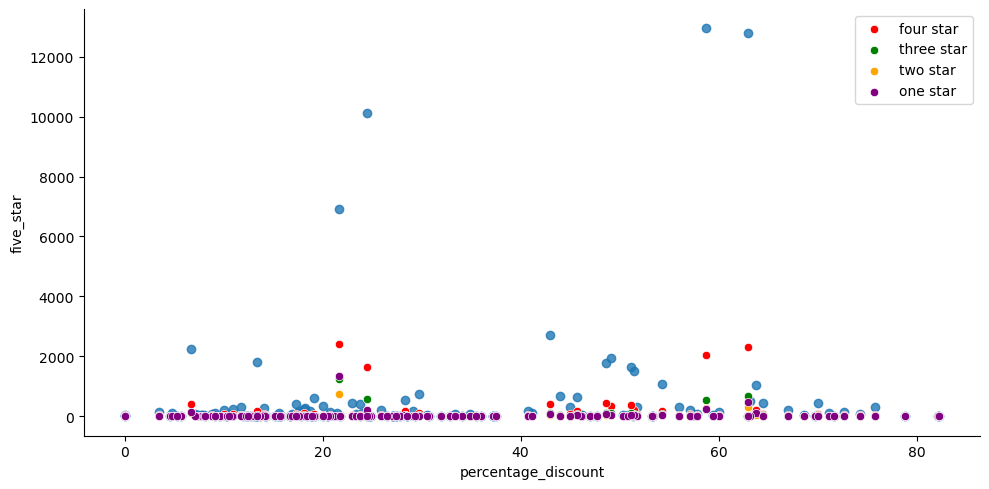

In [52]:
# instantiating a scatter plot for reviews and discounted price
sns.lmplot(x          = 'percentage_discount',  # x-axis feature
           y          = 'five_star',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = False,    # renders a regression line
           aspect     = 2,        # aspect ratio for plot
           data       = black_friday) # DataFrame where features exist

sns.scatterplot(x          = 'percentage_discount',  # x-axis feature
                y          = 'four_star',  # y-axis feature
                color      = 'red',     # categorical data for subsets
                label      = 'four star',    # formats legend if hue != None
                data       = black_friday) # DataFrame where features exist

sns.scatterplot(x          = 'percentage_discount',  # x-axis feature
                y          = 'three_star',  # y-axis feature
                color      = 'green',     # categorical data for subsets
                label      = 'three star',    # formats legend if hue != None
                data       = black_friday) # DataFrame where features exist

sns.scatterplot(x          = 'percentage_discount',  # x-axis feature
                y          = 'two_star',  # y-axis feature
                color      = 'orange',     # categorical data for subsets
                label      = 'two star',    # formats legend if hue != None
                data       = black_friday) # DataFrame where features exist

sns.scatterplot(x          = 'percentage_discount',  # x-axis feature
                y          = 'one_star',  # y-axis feature
                color      = 'purple',     # categorical data for subsets
                label      = 'one star',    # formats legend if hue != None
                data       = black_friday) # DataFrame where features exist
# formatting and displaying the plot
plt.title(label    = 'Influence of reviews in black friday deals')
plt.xlabel(xlabel  = 'Reviews')
plt.ylabel(ylabel  = '%Discount')
plt.xlim(0, 2.8) # changing the x-range for better viewability
plt.tight_layout()
plt.show()

In the graph you can see the little relationship between the discount percentage and the reviews, it is observed that there are only very specific cases where the discount is proportional to the number of reviews, especially with a 5 star rating. Given this, then what other attributes are included in the discount?

In [70]:
# Subsetting the data for those discounts equal and bigger that the AVG
black_friday_bigger = black_friday[black_friday['percentage_discount'] >= 30.2]

# Display the subsetted DataFrame
black_friday_bigger.head(n=5)

,product_name,color,category_id,brand_id,brand_name,category,subcategory_id,subcategory,percentage_discount,original_price,discounted_price,black_friday_deal,height,width,depth,five_star,four_star,three_star,two_star,one_star
0,Allura 67 Kitchen Pantry,2,2,2,Three Posts,Office,2,Organization,40.79,429,254,1,67.0,28.0,15.0,173.0,42.0,22.0,10.0,13.0
1,Theory Glass Picture Frame - Set of 2 (Set of 2),8,1,3,Eichholtz,Bedroom,1,Decor,48.88,489,250,1,7.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Haute Chapeau Haute Chapeau Rouge I,7,3,4,Mercer41,Living Room,1,Decor,43.97,489,274,1,16.0,16.0,1.5,666.0,43.0,25.0,7.0,11.0
3,Daniel Jean-baptiste plants and Flowers no,1,4,6,Bay Isle Home,Entry & Mudroom,1,Decor,82.14,140,25,1,18.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
4,LI55971LL Framed tempered glass shower door 56...,7,5,7,Lili,Bathroom,3,Renovation,50.06,799,399,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [79]:
#Counting Categories values
black_friday_bigger['brand_name'].value_counts(normalize = False,
                               sort      = True,
                               ascending = False).head(n=4)


brand_name
Red Barrel Studio    4
Wade Logan           4
17 Stories           4
Gracie Oaks          3
Name: count, dtype: int64

In [68]:
#New correlation with only big discounts
black_friday_bigger.corr(method='pearson', numeric_only=True).round(decimals=2)


,color,category_id,brand_id,subcategory_id,percentage_discount,original_price,discounted_price,black_friday_deal,height,width,depth,five_star,four_star,three_star,two_star,one_star
color,1.00,0.23,0.18,0.17,-0.18,0.04,0.04,NaN,-0.10,0.06,0.11,-0.10,-0.10,-0.09,-0.08,-0.03
category_id,0.23,1.00,-0.00,0.44,-0.21,-0.01,0.02,NaN,-0.12,-0.08,-0.03,-0.27,-0.27,-0.28,-0.28,-0.31
brand_id,0.18,-0.00,1.00,0.22,0.22,0.10,0.02,NaN,-0.07,0.09,0.15,0.07,0.10,0.10,0.10,0.15
subcategory_id,0.17,0.44,0.22,1.00,-0.08,-0.04,-0.03,NaN,-0.12,-0.05,0.06,0.23,0.27,0.29,0.29,0.32
percentage_discount,-0.18,-0.21,0.22,-0.08,1.00,0.02,-0.20,NaN,0.05,-0.12,-0.13,0.09,0.09,0.10,0.10,0.10
original_price,0.04,-0.01,0.10,-0.04,0.02,1.00,0.95,NaN,-0.05,0.10,-0.06,-0.10,-0.10,-0.10,-0.11,-0.10
discounted_price,0.04,0.02,0.02,-0.03,-0.20,0.95,1.00,NaN,-0.03,0.16,-0.05,-0.09,-0.08,-0.09,-0.09,-0.09
black_friday_deal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,-0.10,-0.12,-0.07,-0.12,0.05,-0.05,-0.03,NaN,1.00,0.42,0.15,-0.04,-0.05,-0.02,-0.03,-0.02
width,0.06,-0.08,0.09,-0.05,-0.12,0.10,0.16,NaN,0.42,1.00,0.77,-0.02,-0.02,-0.01,-0.02,0.01


For this case we wanted to analyze those products with a discount equal or greater than the average of 30.2%, with this we only have a total of 83 products and in the correlation we can observe a positive relationship between the discount percentage and the brand with a 0.22, a little stronger than the correlation between the reviews. Then with this information the statistical analysis of the brands is performed, having in this case a total of 66 brands was reduced to approximately 49%, keeping Red Barrel Studio as the main brand with more discounts, which may indicate that several brands may be willing to offer greater discounts on their products.
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Conclusion

The analysis indicates that customer review scores, original price, product dimensions and brand influence have some impact on discount percentages during Black Friday sales. However, the correlations are generally weak, suggesting that these factors alone do not fully explain discounting strategies. Approximately 30% of the discounted products had no reviews, indicating that reviews are not the primary determinant of discounting. This suggests that other elements, such as inventory levels, competition, and marketing strategies, play an important role in determining discounts. Wayfair is likely to use these promotions to improve the visibility of products with low turnover, brands unknown to the consumer or with very high prices that are unattractive to the customer. This strategy can help Wayfair optimize inventory turnover and attract customers to its website. Overall, these results highlight that discounting strategies take a multi-faceted approach to maximizing sales and customer satisfaction during major sales events such as Black Friday.
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />